In [30]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
#graphing functions
def plotGenotype_2D(graphInfo, title="Genotype Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["WPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["DPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["HPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def plotAllele_2D(graphInfo, title="Allele Generation Plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model_3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()

In [32]:
#model functions
def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict
def run_generation_iF(simData):
    w=simData['qW']
    d=simData['qD']
    fW=simData['fW']
    
    e=simData['e']
    a=simData['a']
    if simData['curGen']<=simData['induceStart']:
        fD=simData['fD']
    else:
        print(simData['curGen'])
        fD=a*simData['fDP']+(1-a)*simData['fD']
    h=simData['h']
    fH=fW-(1-fD)*h
    #print(fH)
    #print(1-(1-fD)*h)
    #print(fW*(1-h)+fD*h)
    #prevent redundant multiplication and create less rounding errors
    w2=w*w
    wd=w*d
    d2=d*d
    fBar=1-((1-fW)*w2+(1-fD)*(d2+2*wd*e)+(1-fH)*(2*wd*(1-e)))
    wPrime=(fW*w2+fH*(wd*(1-e)))
    dPrime=(fD*(d2+2*wd*e)+fH*(wd*(1-e)))
    #wPrime=(fW*w2+fH*(wd*(1-e)))/fBar
    #dPrime=(fD*(d2+2*wd*e)+fH*(wd*(1-e)))/fBar
    #print({'w':wPrime, 'd':dPrime,'fB':1-fBar})
    #print(wPrime+dPrime+(1-fBar))
    wPrime/=fBar
    dPrime/=fBar
    
    #remove rounding errors
    total=wPrime+dPrime
    if total!=1:
        wPrime/=total
        dPrime/=total

    
    homoW=(w2)
    homoD=(d2+2*wd*e)
    heterozygote=(2*wd*(1-e))
    return {'qW':wPrime,'qD':dPrime,'WW':homoW,'DD':homoD,'WD':heterozygote}

    
def run_simulation_iF(simData,graph=False,debug=False):
    graphInfo={"xPlots": [0], "WPlots": [simData['qW']], "DPlots": [simData['qD']], "HPlots": [0], "wPlots":[simData['qW']], "dPlots":[simData['qD']]}
    w=simData['qW']*simData['fW']
    d=simData['qD']*simData['fD']
    total=w+d
    simData['qW']=w/total
    simData['qD']=d/total
    for i in range(1,simData['generations']+1):
        simData['curGen']=i
        update_vars(simData,run_generation_iF(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['WPlots'].append(simData['WW'])
        graphInfo['DPlots'].append(simData['DD'])
        graphInfo['HPlots'].append(simData['WD'])
        if simData['qW']>.99999:
            if graph:
                plotGenotype_2D(graphInfo)
                plotAllele_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plotGenotype_2D(graphInfo)
                plotAllele_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plotGenotype_2D(graphInfo)
        plotAllele_2D(graphInfo)
    if debug:
        print(pd.DataFrame(graphInfo))
    return 0

15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


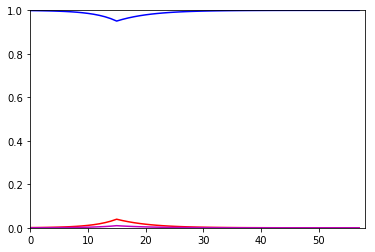

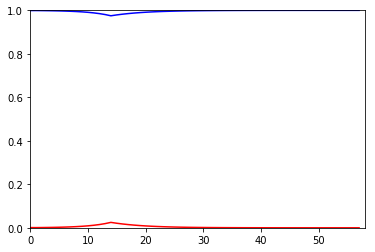

      DPlots    HPlots    WPlots    dPlots    wPlots  xPlots
0   0.001000  0.000000  0.999000  0.001000  0.999000       0
1   0.001120  0.000280  0.998600  0.000903  0.999097       1
2   0.001445  0.000361  0.998194  0.001165  0.998835       2
3   0.001864  0.000466  0.997671  0.001503  0.998497       3
4   0.002404  0.000600  0.996995  0.001940  0.998060       4
5   0.003101  0.000774  0.996124  0.002503  0.997497       5
6   0.004000  0.000999  0.995001  0.003229  0.996771       6
7   0.005160  0.001287  0.993552  0.004167  0.995833       7
8   0.006656  0.001660  0.991684  0.005377  0.994623       8
9   0.008585  0.002139  0.989275  0.006939  0.993061       9
10  0.011074  0.002756  0.986170  0.008956  0.991044      10
11  0.014282  0.003550  0.982167  0.011562  0.988438      11
12  0.018419  0.004571  0.977009  0.014929  0.985071      12
13  0.023753  0.005882  0.970365  0.019281  0.980719      13
14  0.030627  0.007564  0.961809  0.024911  0.975089      14
15  0.039485  0.009716  

-2.7476962050544724

In [33]:
#genotypes match when induceStart is -1 from genotype model because genotypes apply fitness 1 gen later
simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.7,'e':.8,'h':.5,'fDP':.4,'a':.9,'generations':1000,'induceStart':14}
run_simulation_iF(simData,True,True)
